Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


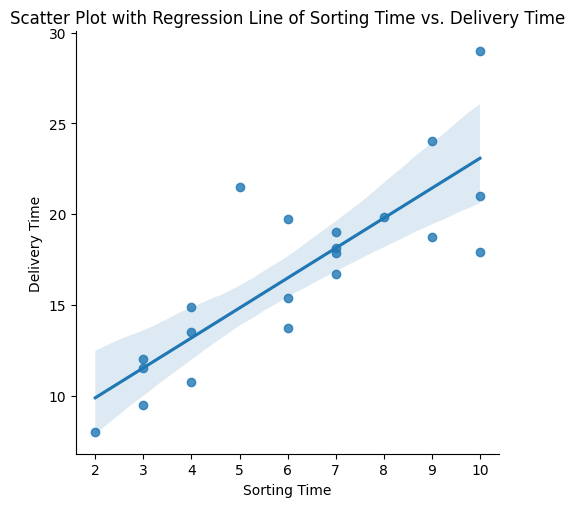

In [7]:
# Scatter plot with regression line to visualize the relationship between Sorting Time and Delivery Time
sns.lmplot(x='Sorting Time', y='Delivery Time', data=df)
plt.title('Scatter Plot with Regression Line of Sorting Time vs. Delivery Time')
plt.show()

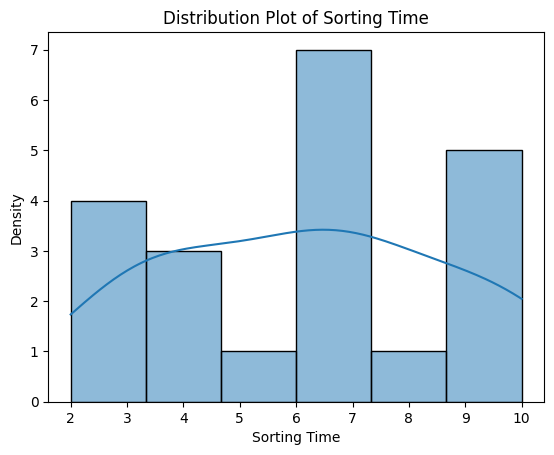

In [8]:
# Distribution plot (histogram and KDE) for Sorting Time
sns.histplot(data=df, x='Sorting Time', kde=True)
plt.title('Distribution Plot of Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Density')
plt.show()

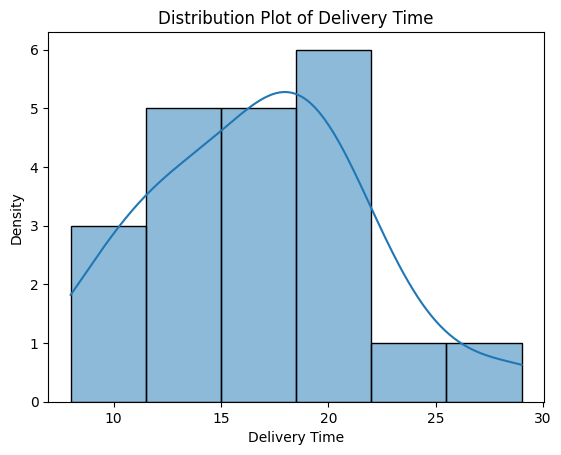

In [9]:
# Distribution plot (histogram and KDE) for Delivery Time
sns.histplot(data=df, x='Delivery Time', kde=True)
plt.title('Distribution Plot of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Density')
plt.show()

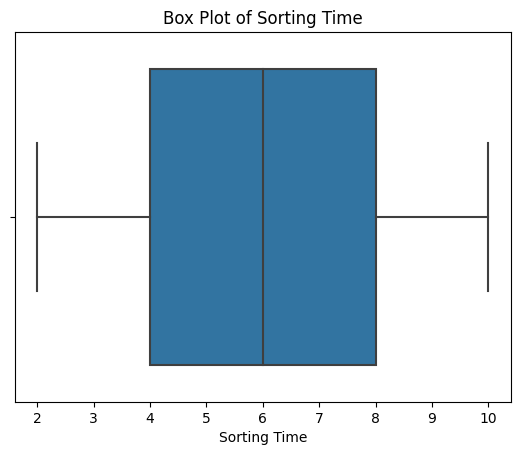

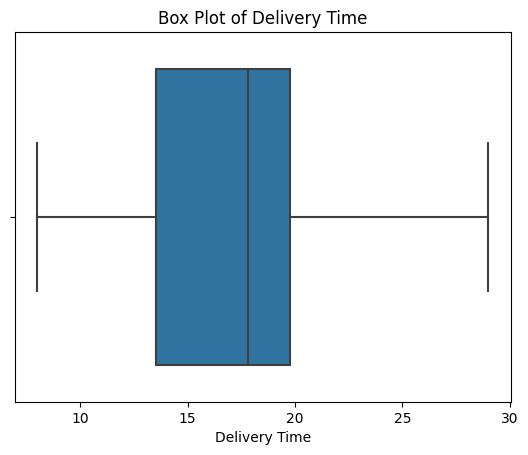

In [10]:
# Create a box plot for Sorting Time
sns.boxplot(x=df['Sorting Time'])
plt.title('Box Plot of Sorting Time')
plt.xlabel('Sorting Time')
plt.show()

# Create a box plot for Delivery Time
sns.boxplot(x=df['Delivery Time'])
plt.title('Box Plot of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()

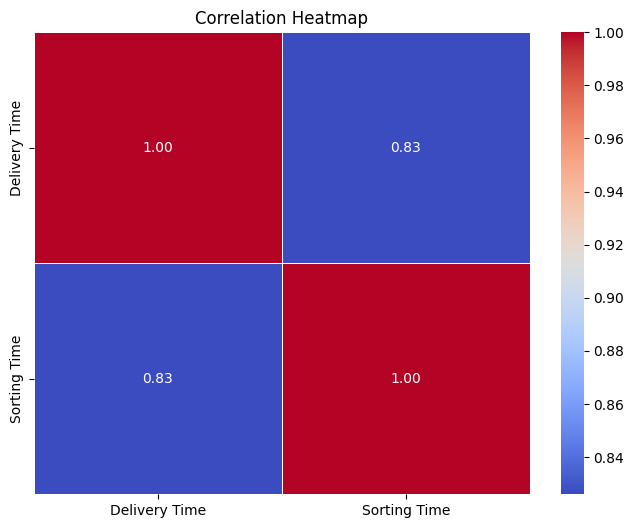

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Apply Log Transformation to Sorting Time
df['Log_Sorting_Time'] = np.log(df['Sorting Time'])

# Apply Square Root Transformation to Sorting Time
df['Sqrt_Sorting_Time'] = np.sqrt(df['Sorting Time'])

# Apply Polynomial Transformation to Sorting Time
df['Sorting_Time_Squared'] = df['Sorting Time'] ** 2

# Apply Box-Cox Transformation to Delivery Time
transformed_delivery_time, lambda_ = boxcox(df['Delivery Time'])

In [13]:
# Create new DataFrames for each transformation
data_transformations = {
    'Original': (df['Sorting Time'], df['Delivery Time']),
    'Log_Sorting_Time': (df['Log_Sorting_Time'], df['Delivery Time']),
    'Sqrt_Sorting_Time': (df['Sqrt_Sorting_Time'], df['Delivery Time']),
    'Sorting_Time_Squared': (df['Sorting_Time_Squared'], df['Delivery Time']),
    'Box-Cox_Delivery_Time': (df['Sorting Time'], transformed_delivery_time)
}

In [14]:
# Perform Linear Regression with each transformation
for transformation_name, (X, y) in data_transformations.items():
    X = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)
    
    print(f"Transformation: {transformation_name}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}\n")

Transformation: Original
RMSE: 2.7916503270617654
R-squared: 0.6822714748417231

Transformation: Log_Sorting_Time
RMSE: 2.733171476682066
R-squared: 0.6954434611324223

Transformation: Sqrt_Sorting_Time
RMSE: 2.731543210091211
R-squared: 0.695806227630867

Transformation: Sorting_Time_Squared
RMSE: 3.011377282646288
R-squared: 0.6302871815826638

Transformation: Box-Cox_Delivery_Time
RMSE: 0.7561439130505822
R-squared: 0.7026641437912345

